## Modelagem dos preços da Plataforma Airbnb (Rio de Janeiro - RJ) ##

### CRISP-DM (Cross Industry Process Model for Data Mining). ###

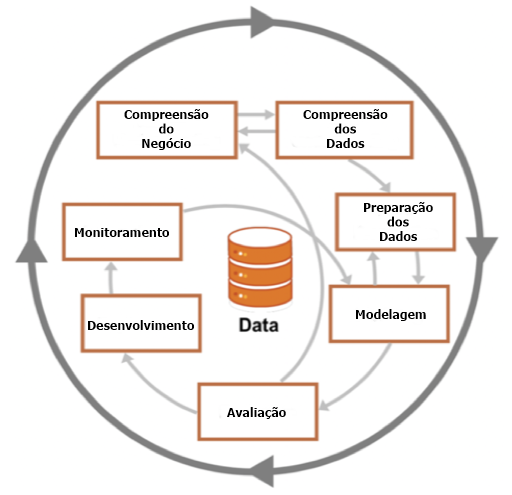

### Entendimento do Negócio ###

* Comunidade baseada no compartilhamento para anunciar imóveis para alugar e reservar acomodações únicas, em qualquer lugar do mundo.
* O Airbnb ajuda a tornar o compartilhamento fácil, agradável e seguro.
* A equipe de atendimento à comunidade global está disponível 24h em 11 idiomas para ajudar na descomplicação de processos como remarcação de reservas, reembolsos e estornos.

### Compreensão e Pré-Processamento dos Dados ###

In [1]:
# Import de Bibliotecas.

!pip install missingno

# importar os pacotes necessários

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

# configurar as visualizações

sns.set_style('darkgrid')
sns.set_palette('Accent')

In [2]:
# Carregando o Dataset - Fonte: http://insideairbnb.com/get-the-data.html.

df = pd.read_csv("listings.csv")

In [3]:
# Dimensões do Dataframe.

print('DIMENSÕES DO DATAFRAME:')
print(f'Linhas:  {df.shape[0]}')
print(f'Colunas:  {df.shape[1]}')

DIMENSÕES DO DATAFRAME:
Linhas:  23361
Colunas:  18


In [4]:
# Verificando os tipos dos dados.

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                          object
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                           float64
dtype: object

In [5]:
df.dtypes.value_counts()

float64    10
object      6
int64       2
dtype: int64

**Descrição:**

* `id` - id gerado para identificação do imóvel.
* `name` - nome da propriedade.
* `host_id` - id do proprietário.
* `host_name` - nome do propietário.
* `neighbourhood_group` - grupo de bairros (não contém nenhum valor válido).
* `neighbourhood` - nome do bairro.
* `latitude` - coordenada da latitude da propriedade.
* `longitude` - coordenada da longitude da propriedade.
* `room_type` - tipo de quarto oferecido.
* `price` - preço para alugar o imóvel.
* `minimum_nights` - quantidade mínima de noites para reservar.
* `number_of_reviews` - número de reviews que a propriedade possui.
* `last_review` - data do último review.
* `reviews_per_month` - quantidade de reviews por mês.
* `calculated_host_listings_count` - quantidade de imóveis do mesmo propietário.
* `availability_365` - número de dias de disponibilidade dentro do ano.

In [6]:
# Visualização das 05 linhas iniciais.

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.1794,Entire home/apt,350.0,5.0,266.0,2021-05-21,2.07,1.0,262.0,12.0,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,296.0,3.0,85.0,2017-04-22,0.85,1.0,57.0,0.0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,168.0,4.0,238.0,2019-04-27,1.84,1.0,300.0,0.0,NaN
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,278.0,2.0,181.0,2019-12-06,1.90,1.0,179.0,0.0,NaN
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,150.0,3.0,373.0,2019-06-15,3.05,1.0,59.0,34.0,NaN


In [7]:
# Visualização das 05 linhas finais.

df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
23356,52987571,Tabas | PACOTE REVEILLON/CARNAVAL Ipanema | IP005,104933317,Simone,NaN,Ipanema,-22.985030,-43.20493,Entire home/apt,5700.0,5.0,0.0,NaN,NaN,10.0,18.0,0.0,NaN
23357,52987764,Tabas | PACOTE REVEILLON/CARNAVAL Leblon | LB007,104933317,Simone,NaN,Leblon,-22.980554,-43.224482250230544,Entire home/apt,2000.0,5.0,0.0,NaN,NaN,10.0,18.0,0.0,NaN
23358,52990095,Apartamento reformado - Posto 5 - Copacabana,64920145,Gustavo,NaN,Copacabana,-22.980529,-43.1941373007529,Entire home/apt,1100.0,1.0,0.0,NaN,NaN,1.0,11.0,0.0,NaN
23359,52991032,"Omar do Rio - BR 194/1104: Studio Copacabana, ...",6000862,Omar Do Rio,NaN,Copacabana,-22.963344,-43.17978706147178,Entire home/apt,224.0,1.0,0.0,NaN,NaN,79.0,363.0,0.0,NaN
23360,52993621,COBERTURA IPANEMA PISCINA + ESTACIONAMENTO GRÁTIS,35739862,Rodrigo,NaN,Ipanema,-22.983136,-43.2028455597726,Entire home/apt,813.0,2.0,0.0,NaN,NaN,12.0,180.0,0.0,NaN


**Dados Faltantes** 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23361 entries, 0 to 23360
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23361 non-null  int64  
 1   name                            23340 non-null  object 
 2   host_id                         23361 non-null  int64  
 3   host_name                       23356 non-null  object 
 4   neighbourhood_group             2 non-null      float64
 5   neighbourhood                   23361 non-null  object 
 6   latitude                        23361 non-null  float64
 7   longitude                       23360 non-null  object 
 8   room_type                       23360 non-null  object 
 9   price                           23360 non-null  float64
 10  minimum_nights                  23360 non-null  float64
 11  number_of_reviews               23360 non-null  float64
 12  last_review                     

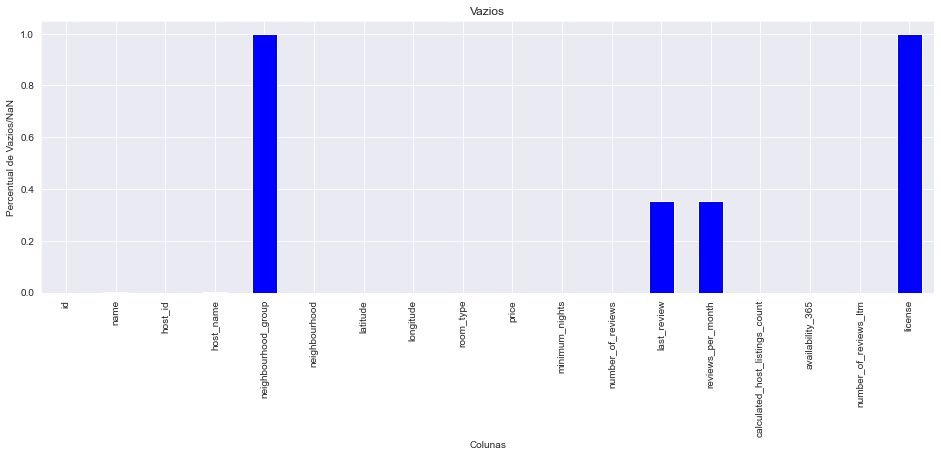

In [9]:
percentage_missing_data = df.isnull().sum() / df.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='blue', figsize = (16, 5))
ax.set_xlabel('Colunas')
ax.set_ylabel('Percentual de Vazios/NaN')
ax.set_title('Vazios')
plt.show()

In [10]:
df.isna().sum()

id                                    0
name                                 21
host_id                               0
host_name                             5
neighbourhood_group               23359
neighbourhood                         0
latitude                              0
longitude                             1
room_type                             1
price                                 1
minimum_nights                        1
number_of_reviews                     1
last_review                        8254
reviews_per_month                  8254
calculated_host_listings_count        2
availability_365                      2
number_of_reviews_ltm                 2
license                           23361
dtype: int64

In [11]:
# Ordenando em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / len(df)).sort_values(ascending=False) * 100

license                           100.000000
neighbourhood_group                99.991439
reviews_per_month                  35.332392
last_review                        35.332392
name                                0.089893
host_name                           0.021403
number_of_reviews_ltm               0.008561
availability_365                    0.008561
calculated_host_listings_count      0.008561
number_of_reviews                   0.004281
price                               0.004281
minimum_nights                      0.004281
room_type                           0.004281
longitude                           0.004281
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

**Quanto à questão de dados faltantes, em uma breve verificação podemos identificar que:**

* A coluna **`license`** possui 100% dos seus valores faltantes. 
* A coluna **`neighbourhood_group`** possui  quase 100% dos seus valores faltantes. 
* As variáveis**`reviews_per_month`** e **`last_review`** possuem valores nulos em quase metade das linhas.
* As variáveis **`name`** tem aproximadamente 0,1% dos valores nulos.

In [12]:
# Eliminando colunas.

to_drop = ['license', 'neighbourhood_group', 'latitude', 'longitude', 'last_review', 'reviews_per_month']
df.drop(to_drop, axis=1, inplace=True)

In [13]:
# Dimensões Atualizadas do Dataframe.

print('DIMENSÕES DO DATAFRAME:')
print(f'Linhas:  {df.shape[0]}')
print(f'Colunas:  {df.shape[1]}')

DIMENSÕES DO DATAFRAME:
Linhas:  23361
Colunas:  12


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23361 entries, 0 to 23360
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23361 non-null  int64  
 1   name                            23340 non-null  object 
 2   host_id                         23361 non-null  int64  
 3   host_name                       23356 non-null  object 
 4   neighbourhood                   23361 non-null  object 
 5   room_type                       23360 non-null  object 
 6   price                           23360 non-null  float64
 7   minimum_nights                  23360 non-null  float64
 8   number_of_reviews               23360 non-null  float64
 9   calculated_host_listings_count  23359 non-null  float64
 10  availability_365                23359 non-null  float64
 11  number_of_reviews_ltm           23359 non-null  float64
dtypes: float64(6), int64(2), object(

In [15]:
# simplesmente drop a linha inteira com NaN na coluna "name"
df.dropna(subset=["name"], axis=0, inplace=True)
df.dropna(subset=["host_name"], axis=0, inplace=True)
df.dropna(subset=["room_type"], axis=0, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23334 entries, 0 to 23360
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23334 non-null  int64  
 1   name                            23334 non-null  object 
 2   host_id                         23334 non-null  int64  
 3   host_name                       23334 non-null  object 
 4   neighbourhood                   23334 non-null  object 
 5   room_type                       23334 non-null  object 
 6   price                           23334 non-null  float64
 7   minimum_nights                  23334 non-null  float64
 8   number_of_reviews               23334 non-null  float64
 9   calculated_host_listings_count  23333 non-null  float64
 10  availability_365                23333 non-null  float64
 11  number_of_reviews_ltm           23333 non-null  float64
dtypes: float64(6), int64(2), object(

In [17]:
# substituindo pela m[edia os valores ausentes

avg=df['calculated_host_listings_count'].astype('float').mean(axis=0)
df['calculated_host_listings_count'].replace(np.nan, avg, inplace=True)

In [18]:
avg2=df['availability_365'].astype('float').mean(axis=0)
df['availability_365'].replace(np.nan, avg2, inplace=True)

In [19]:
avg3=df['number_of_reviews_ltm'].astype('float').mean(axis=0)
df['number_of_reviews_ltm'].replace(np.nan, avg3, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23334 entries, 0 to 23360
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23334 non-null  int64  
 1   name                            23334 non-null  object 
 2   host_id                         23334 non-null  int64  
 3   host_name                       23334 non-null  object 
 4   neighbourhood                   23334 non-null  object 
 5   room_type                       23334 non-null  object 
 6   price                           23334 non-null  float64
 7   minimum_nights                  23334 non-null  float64
 8   number_of_reviews               23334 non-null  float64
 9   calculated_host_listings_count  23334 non-null  float64
 10  availability_365                23334 non-null  float64
 11  number_of_reviews_ltm           23334 non-null  float64
dtypes: float64(6), int64(2), object(

**Outliers**

**Histograma das Variáveis**

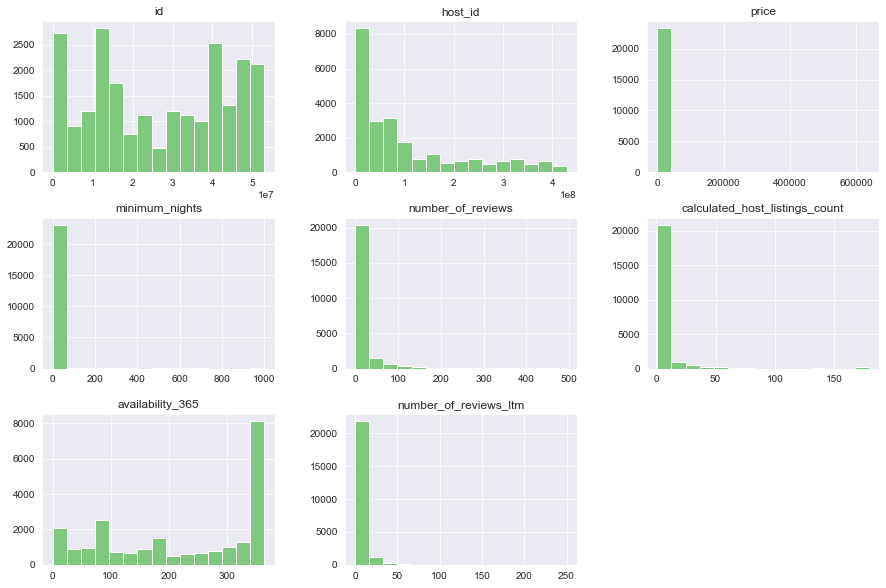

In [21]:
# Análise visual das variáveis númericas através de um gráfico de frequências (histograma) em busca de outliers.

df.hist(bins=15, figsize=(15,10));

In [22]:
# Descrevendo as Estatísticas das Variáveis Numéricas.

df[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].describe().round(2)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,23334.00,23334.00,23334.00,23334.00,23334.00
mean,726.53,5.33,14.41,6.99,223.55
std,4967.28,22.68,33.71,20.63,131.73
min,0.00,1.00,0.00,1.00,0.00
25%,160.00,1.00,0.00,1.00,89.00
50%,285.00,3.00,2.00,1.00,256.00
75%,561.00,4.00,11.00,3.00,359.00
max,637760.00,1000.00,494.00,179.00,365.00


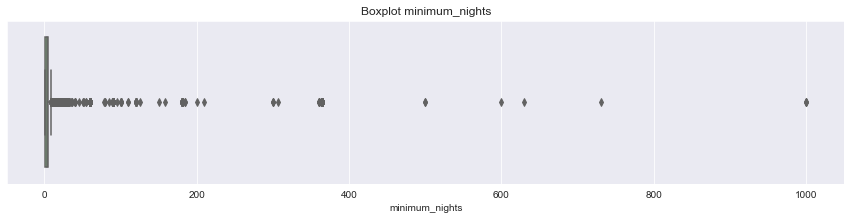

[minimun_nights]
Valores acima de 30: 265 entradas
Porcentagem: 1.1357%


In [23]:
# Construção do Boxplot para variável minimum_nights.

plt.figure(figsize=(15,3))
sns.boxplot(data=df, x='minimum_nights')
plt.title('Boxplot minimum_nights')
plt.show()

# Verificar a quantidade de valores acima de 30 dias para variável minimum_nights.

print(f'[minimun_nights]\nValores acima de 30: {len(df[df.minimum_nights > 30])} entradas')
print('Porcentagem: {:.4f}%'.format(len(df[df.minimum_nights > 30])/ len(df.minimum_nights)* 100))

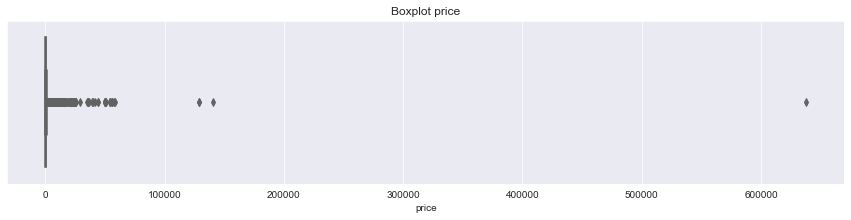

[price]
Valores acima de 1500: 1670 entradas
Porcentagem: 7.1569%


In [24]:
# Construção do Boxplot para variável price.

plt.figure(figsize=(15,3))
sns.boxplot(data=df, x='price')
plt.title('Boxplot price')
plt.show()
# Verificar a quantidade de valores acima R$ 1500,00 para variável price.

print(f'[price]\nValores acima de 1500: {len(df[df.price > 1500])} entradas')
print('Porcentagem: {:.4f}%'.format(len(df[df.price > 1500])/ len(df.price) * 100))

**Quanto à construção dos Boxplots para verificar a presença de outliers, podemos verificar que:**

* Considerando-se a variável **minimum_nights** que apresenta um pouco mais de 1% em valores acima de 30 dias de permanência nos imóveis locados, mas que causa um enorme impacto na média dos valores da variável, sendo forte candidata a ter seus valores transformados na etapa de preparação de dados.

* Já na variável **price** identificamos por volta de 7% de valores de imóveis com valores acima de R$ 1500,00 o que pode estar distorcendo a média e mediana da distribuição, constituindo-se em forte candidato a receber tratamento na etapa de preparação dos dados.

**Informações Iniciais**

In [54]:
# Quantidade de cada tipo de imóvel disponível

df['room_type'].value_counts()

Entire home/apt    17179
Private room        5561
Shared room          514
Hotel room            79
0.83                   1
Name: room_type, dtype: int64

In [53]:
# 10 localidades mais caras

df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
São Cristóvão         10148.784615
Joá                    4123.398148
São Conrado            2270.064865
Alto da Boa Vista      2069.617647
Santa Cruz             1827.421053
Anchieta               1495.000000
Cachambi               1319.160000
Caju                   1291.000000
Barra de Guaratiba     1242.560000
Jardim Botânico        1232.723757
Name: price, dtype: float64

In [55]:
# Imóveis por localidade

df['neighbourhood'].value_counts()

Copacabana         6692
Barra da Tijuca    2381
Ipanema            2303
Jacarepaguá        1110
Leblon             1074
                   ... 
Maré                  1
Barros Filho          1
Jacarezinho           1
Deodoro               1
Cavalcanti            1
Name: neighbourhood, Length: 153, dtype: int64

### Preparação dos Dados ###

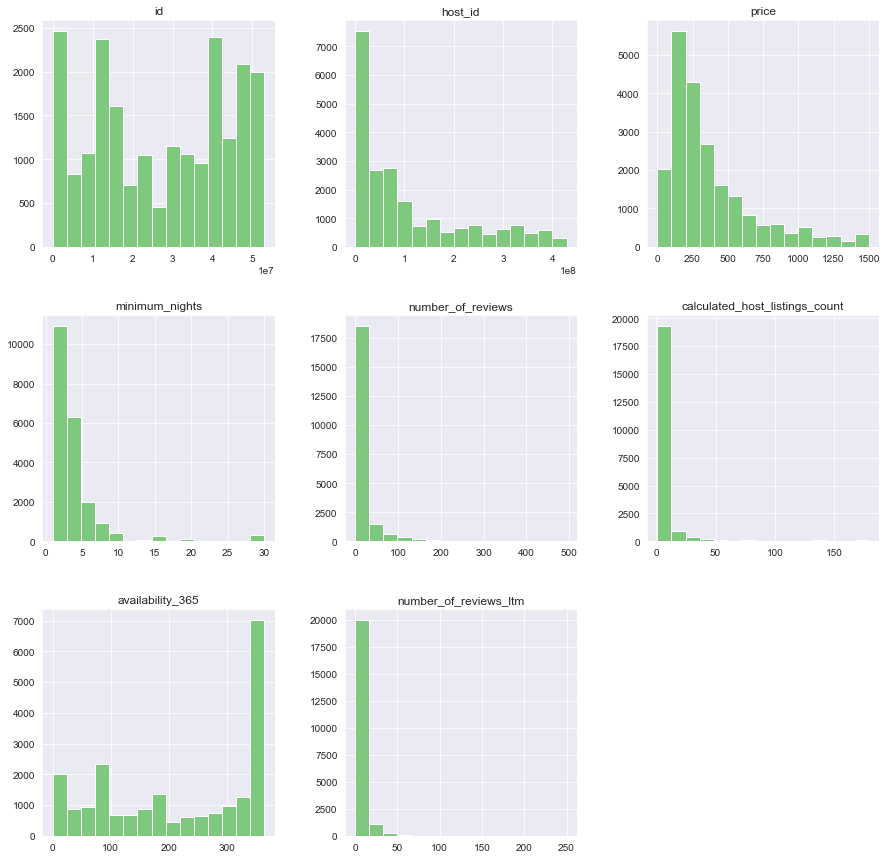

In [26]:
# Remoção de outliers na construção de um novo dataset.

df_limpo = df.copy()
df_limpo.drop(df_limpo[df_limpo.price > 1500].index, axis=0, inplace=True)
df_limpo.drop(df_limpo[df_limpo.minimum_nights > 30].index, axis=0, inplace=True)

# E na sequência buscou-se plotar novamente o histograma para as variáveis numéricas.

df_limpo.hist(bins=15, figsize=(15,15));

In [29]:
# Matriz de correlação entre as variáveis numéricas dataset df_limpo.

corr = df_limpo[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.116562,-0.152574,0.075348,0.146099
minimum_nights,0.116562,1.000000,-0.075040,-0.051235,-0.004512
number_of_reviews,-0.152574,-0.075040,1.000000,-0.046192,-0.155527
calculated_host_listings_count,0.075348,-0.051235,-0.046192,1.000000,0.023658
availability_365,0.146099,-0.004512,-0.155527,0.023658,1.000000


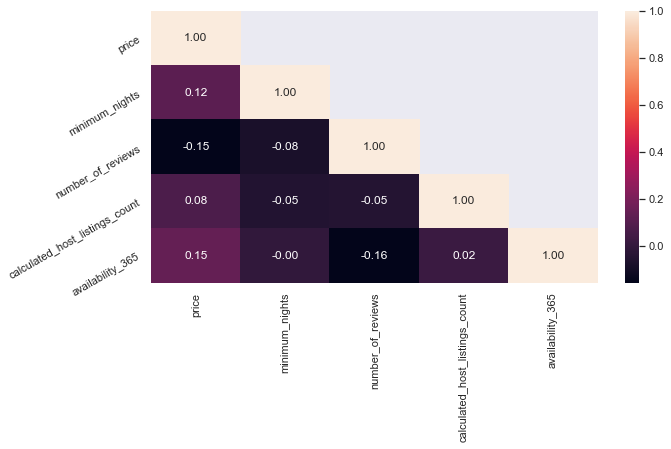

In [30]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,5))

# criando uma máscara para ver apenas os valores de correlação uma vez

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

### Modelagem ###

In [31]:
# Uma codificação a quente para variáveis categóricas
df_limpo = pd.get_dummies(df_limpo)
df_limpo.shape

(21429, 25483)

In [32]:
# Embaralhe os dados para garantir uma boa distribuição para os conjuntos de treinamento e teste
from sklearn.utils import shuffle
df_limpo = shuffle(df_limpo)

# Extrair recursos e etiquetas
y = df_limpo['price']
X = df_limpo.drop('price', axis = 1)

# Conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)

train_X.shape, test_X.shape

((16071, 25482), (5358, 25482))

**Padrão Regressor Random Forest**

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Crie o pipeline (SimpleImputer + scaler + regressor)
my_pipeline_RF = make_pipeline(SimpleImputer(), StandardScaler(),
                               RandomForestRegressor(random_state=42))

# Ajuste o modelo
my_pipeline_RF.fit(train_X, train_y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

##### Avaliação do modelo

Avaliamos esse modelo no conjunto de testes, utilizando o erro absoluto médio para medir o desempenho do modelo. Também incluiremos o erro quadrático médio quadrado (RMSE) para fins de integridade. Como faremos isso repetidamente, é uma boa prática criar uma função.

In [37]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def aval_model(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    print("Erro Absoluto Médio: " + str(round(median_absolute_error(predictions, evaluate_set), 2))) 
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 2)
    print("RMSE: " + str(RMSE)) 

In [38]:
aval_model(my_pipeline_RF, test_X, test_y)

Erro Absoluto Médio: 88.17
RMSE: 257.86


Também avaliamos o modelo no conjunto de treinamento, para garantir que evitamos o overfitting.

In [39]:
aval_model(my_pipeline_RF, train_X, train_y)

Erro Absoluto Médio: 31.37
RMSE: 94.7


In [43]:
importances = my_pipeline_RF.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.sort_values("importance", ascending=False).head(22)

,feature,importance
5,availability_365,0.118954
0,id,0.097257
25478,room_type_Entire home/apt,0.080014
3,number_of_reviews,0.058190
1,host_id,0.046467
6,number_of_reviews_ltm,0.021913
2,minimum_nights,0.021241
4,calculated_host_listings_count,0.018998
25389,neighbourhood_Ipanema,0.017128
25334,neighbourhood_Barra da Tijuca,0.016016


In [41]:
# Importâncias cumulativas
feature_importances.importance.sum()

1.0

### TESTE TECNICO COGNITIVO.AI ##

**Cézar Augusto Meira Carmo - cezaraugustomeiracarmo@gmail.com**